# Desafío Spike

## Parte 1: datos descargados desde github

## Parte 2: exploración de datos

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
from sklearn import preprocessing

In [50]:
pd.set_option('display.max_columns', 999)

In [2]:
df = pd.read_csv('caudal_extra.csv', parse_dates=['fecha'])

In [3]:
df.shape

(1411180, 17)

In [4]:
df.dtypes

Unnamed: 0                              int64
codigo_estacion                         int64
institucion                            object
fuente                                 object
nombre                                 object
altura                                  int64
latitud                               float64
longitud                              float64
codigo_cuenca                           int64
nombre_sub_cuenca                      object
cantidad_observaciones                  int64
fecha                     datetime64[ns, UTC]
caudal                                float64
gauge_id                                int64
gauge_name                             object
precip_promedio                       float64
temp_max_promedio                     float64
dtype: object

In [5]:
df.describe()

,Unnamed: 0,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio
count,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.383413e+06,1.259617e+06
mean,7.055895e+05,6.279953e+06,5.855691e+02,-3.367748e+01,-7.121826e+01,6.255881e+01,1.573983e+04,9.552229e+01,6.279953e+06,1.921009e+00,1.921110e+01
std,4.073727e+05,2.891695e+06,8.652682e+02,6.940820e+00,1.174363e+00,2.839921e+01,7.545197e+03,2.526337e+02,2.891695e+06,7.361936e+00,7.307081e+00
min,0.000000e+00,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,8.020000e+02,0.000000e+00,1.020003e+06,0.000000e+00,-1.905000e+01
25%,3.527948e+05,4.320001e+06,4.500000e+01,-3.721190e+01,-7.206810e+01,4.300000e+01,1.025500e+04,1.250000e+00,4.320001e+06,0.000000e+00,1.370000e+01
50%,7.055895e+05,5.734001e+06,3.950000e+02,-3.359390e+01,-7.125470e+01,5.700000e+01,1.488900e+04,8.950000e+00,5.734001e+06,0.000000e+00,1.908429e+01
75%,1.058384e+06,8.308000e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,2.061100e+04,6.970000e+01,8.308000e+06,0.000000e+00,2.520000e+01
max,1.411179e+06,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,3.666700e+04,1.580500e+04,1.287600e+07,2.586000e+02,4.150000e+01


### De lo anterior se logra apreciar que las variables precip_promedio y temp_max_promedio tienen missing values ya que el total de datos es menor al número total de registros

In [6]:
df.sample(3)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
951020,951020,3453001,DGA,dga_web,Rio Copiapo En Angostura,48,-27.319401,-70.838097,34,Rio Copiapo Bajo (Entre Q. Paipote Y Desemb.),18383,1979-11-28 00:00:00+00:00,0.101,3453001,Rio Copiapo En Angostura,0.000000,32.000000
308320,308320,4726001,DGA,dga_web,Rio Illapel En El Peral,0,-31.664700,-71.254700,47,Rio Illapel,12011,2001-04-13 00:00:00+00:00,0.642,4726001,Rio Illapel En El Peral,1.666667,21.200001
435732,435732,9116001,DGA,dga_web,Rio Cholchol En Cholchol,20,-38.608101,-72.847801,91,R. Chol Chol,22722,2015-06-25 00:00:00+00:00,139.000,9116001,Rio Cholchol En Cholchol,1.188889,13.800000


In [7]:
df['nombre'].unique().shape

(133,)

In [58]:
for g in list(df.gauge_id.unique()):
    print (df['fecha'][df['gauge_id'] == g].min(), df['fecha'][df['gauge_id'] == g].max())

1960-01-02 00:00:00 1984-07-08 00:00:00
1995-08-24 00:00:00 2016-07-31 00:00:00
1999-06-13 00:00:00 2018-03-09 00:00:00
2000-01-01 00:00:00 2018-03-09 00:00:00
2000-01-01 00:00:00 2018-03-09 00:00:00
2002-03-12 00:00:00 2017-05-31 00:00:00
2002-04-10 00:00:00 2016-10-21 00:00:00
2002-12-20 00:00:00 2018-03-09 00:00:00
2003-01-01 00:00:00 2018-03-09 00:00:00
2006-01-01 00:00:00 2018-03-09 00:00:00
2007-09-26 00:00:00 2016-08-31 00:00:00
2009-08-01 00:00:00 2018-03-09 00:00:00
2009-08-05 00:00:00 2018-03-09 00:00:00
2014-01-01 00:00:00 2018-03-09 00:00:00
1999-02-16 00:00:00 2018-03-09 00:00:00
1999-03-03 00:00:00 2018-03-09 00:00:00
1963-04-11 00:00:00 2017-09-30 00:00:00
1963-04-01 00:00:00 2017-07-31 00:00:00
1985-08-06 00:00:00 2017-06-30 00:00:00
2001-04-23 00:00:00 2016-03-25 00:00:00
1988-08-25 00:00:00 2018-03-09 00:00:00
1984-12-12 00:00:00 2017-05-31 00:00:00
1987-08-21 00:00:00 1997-08-17 00:00:00
2001-06-07 00:00:00 2018-03-09 00:00:00
1971-10-11 00:00:00 2017-07-31 00:00:00


### Lo anterior nos indica que para cada cuenca hay un número diferente de datos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F64F0BE08>,
      dtype=object)

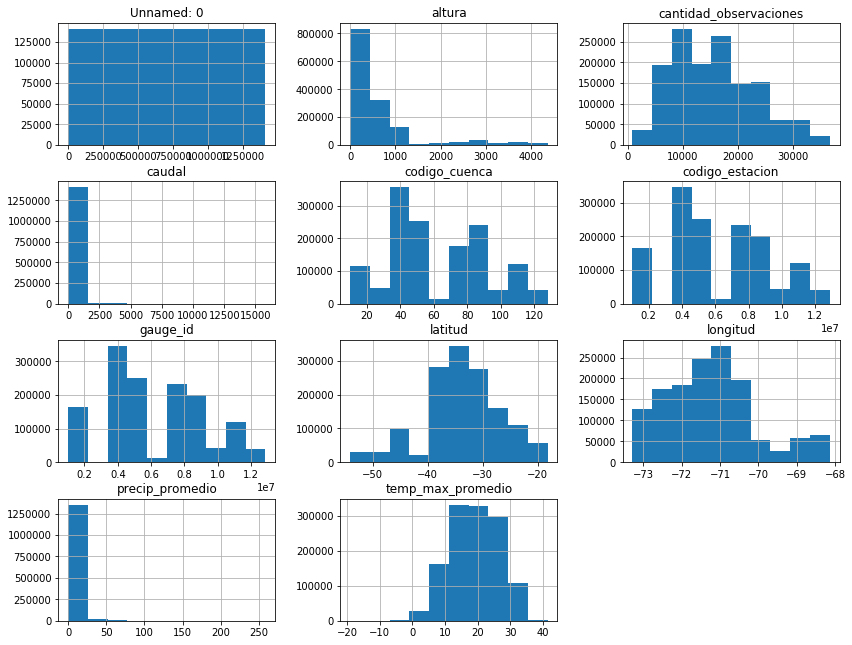

In [8]:
df.hist(figsize=(14,11))

## Parte 3: Plots

In [9]:
# quitamos el timezone de la columna fecha ya que no es requerido y simplifica las funciones definidas a continuación
df['fecha'] = df['fecha'].dt.tz_localize(None)

In [10]:
def time_plot_una_estación(codigo_estacion, columna, fecha_min = '1970-01-01', fecha_max = '2019-12-31'):
    df_filtrado = df[(df['codigo_estacion'] == codigo_estacion) &
                     (df['fecha'] >= pd.to_datetime(fecha_min)) &
                     (df['fecha'] <= pd.to_datetime(fecha_max))]
    if(df_filtrado.shape[0] != 0):
        df_filtrado.plot(x='fecha', y=columna, figsize=(14,11))
    else:
        print('No data to plot, sorry :(')

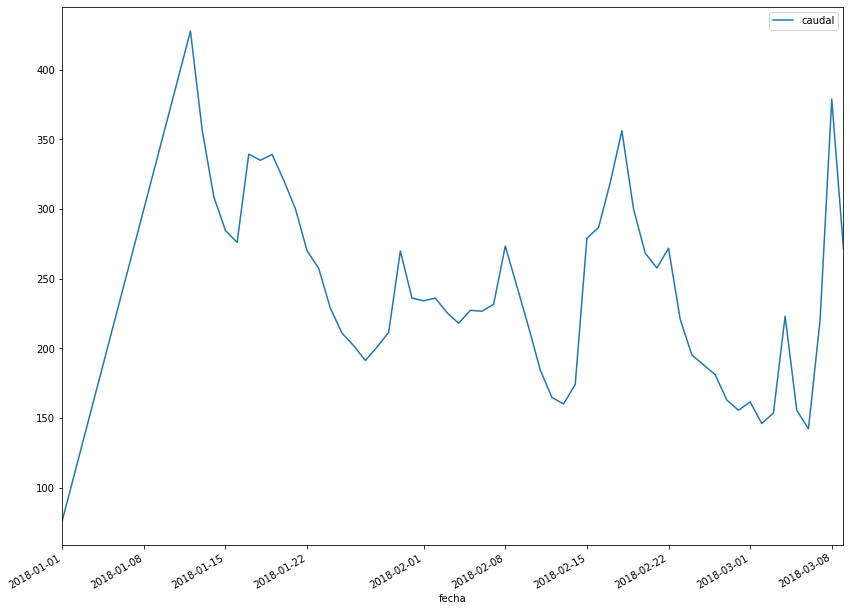

In [11]:
time_plot_una_estación(11337001, 
                       'caudal', 
                       fecha_min = '2018-01-01', 
                       fecha_max = '2019-12-31')

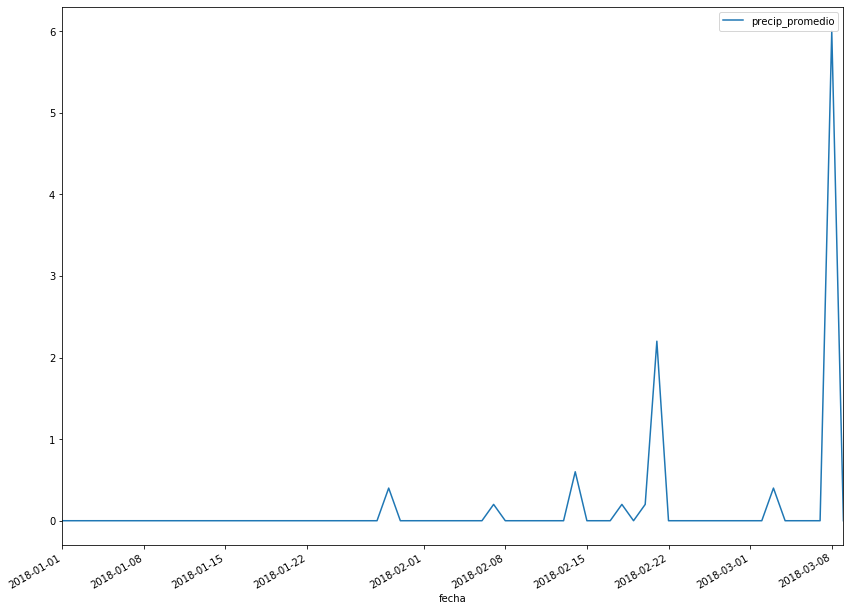

In [12]:
time_plot_una_estación(11337001, 
                       'precip_promedio', 
                       fecha_min = '2018-01-01', 
                       fecha_max = '2019-12-31')

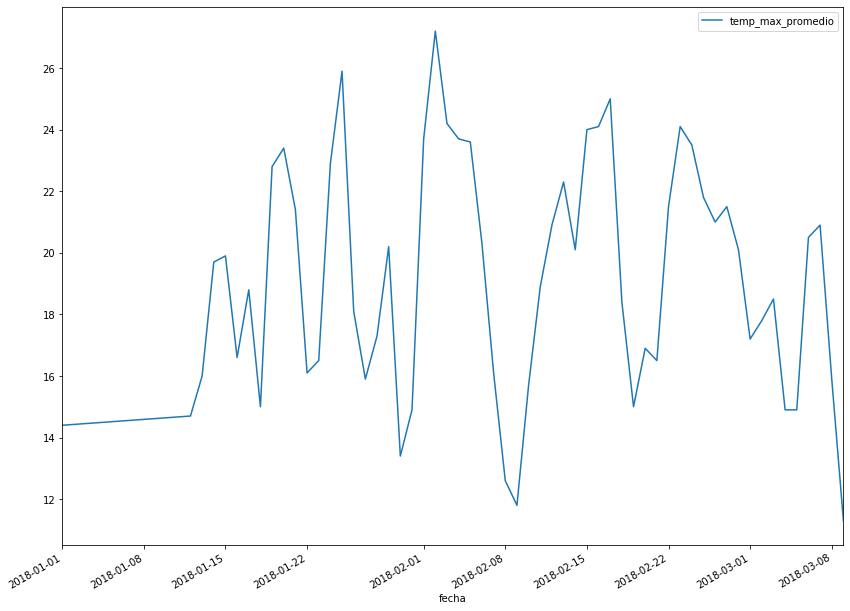

In [13]:
time_plot_una_estación(11337001, 
                       'temp_max_promedio', 
                       fecha_min = '2018-01-01', 
                       fecha_max = '2019-12-31')

In [20]:
# normalizamos las columnas con min-max para dejarlas entre 0 y 1
def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min = '1970-01-01', fecha_max = '2019-12-31'):
    df_filtrado = df[(df['codigo_estacion'] == codigo_estacion) &
                     (df['fecha'] >= pd.to_datetime(fecha_min)) &
                     (df['fecha'] <= pd.to_datetime(fecha_max))].copy()
    if(df_filtrado.shape[0] != 0):
        ax = plt.gca()
        for c in columnas:
            df_filtrado[c]=(df_filtrado[c]-df_filtrado[c].min())/(df_filtrado[c].max()-df_filtrado[c].min())
            df_filtrado.plot(x='fecha', y=c, ax=ax, figsize=(14,11))
        plt.show()
    else:
        print('No data to plot, sorry :(')

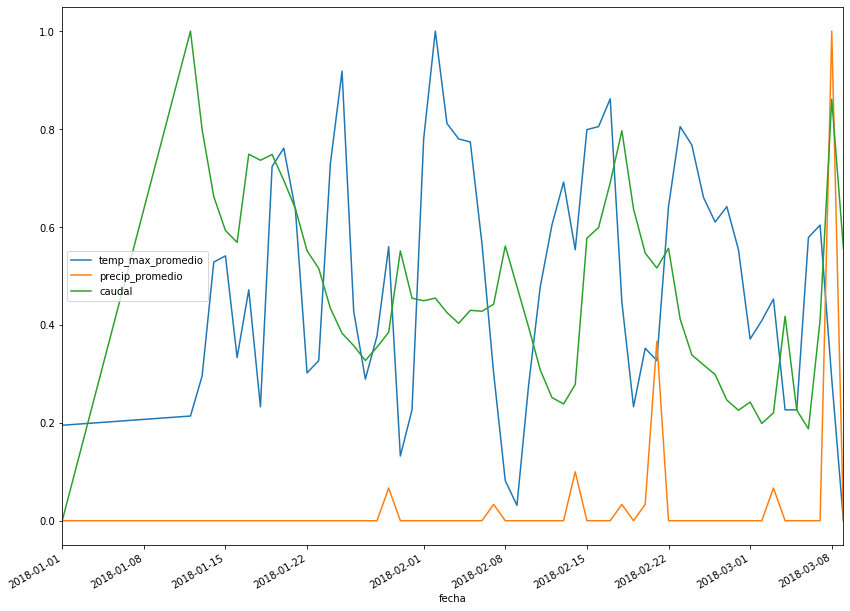

In [21]:
time_plot_estaciones_varias_columnas(11337001, 
                       ['temp_max_promedio', 'precip_promedio', 'caudal'], 
                       fecha_min = '2018-01-01', 
                       fecha_max = '2019-12-31')

## Parte 4: Nuevas Features

In [24]:
# calculamos la estación del año para cada fecha


Y = 2000 # dummy leap year to allow input Y-02-29 (leap day)
seasons = [('summer', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('autumn', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('winter', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('spring', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('summer', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

#print(get_season(date.today())) #test

In [25]:
df['season'] = df['fecha'].apply(get_season)

In [27]:
df.sample(3)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,season
588241,588241,5410005,DGA,dga_web,Rio Aconcagua En San Felipe,650,-32.757198,-70.736702,54,Aconcagua Medio,20264,2012-02-05,25.300,5410005,Rio Aconcagua En San Felipe,0.0,27.333334,summer
687648,687648,1050004,DGA,dga_web,Rio Collacagua En Peablanca,3853,-20.111900,-68.840797,10,Salar Del Huasco,10943,1995-10-09,0.127,1050004,Rio Collacagua En Peablanca,0.0,17.200001,spring
707879,707879,8358001,DGA,dga_web,Rio Vergara En Tijeral,40,-37.733299,-72.616699,83,Rios Malleco Y Vergara,17974,2003-03-13,10.200,8358001,Rio Vergara En Tijeral,0.2,23.250000,summer


In [28]:
def q95(x):
    return x.quantile(0.95)

In [35]:
df_percentiles = df.groupby(['season', 'codigo_estacion']).agg({'caudal':[q95],
                                                                'precip_promedio':[q95],
                                                                'temp_max_promedio':[q95]})
df_percentiles.columns = ['_'.join(col).strip() for col in df_percentiles.columns.values]
df_percentiles.reset_index(inplace=True)

In [36]:
df_percentiles.head()

,season,codigo_estacion,caudal_q95,precip_promedio_q95,temp_max_promedio_q95
0,autumn,1020003,0.2395,2.175,14.624000
1,autumn,1021001,4.4750,1.500,15.000000
2,autumn,1050004,0.3845,0.000,18.100000
3,autumn,1211001,4.0100,0.800,18.200001
4,autumn,2103003,0.1580,0.000,18.900000


In [37]:
df = df.merge(df_percentiles, on = ['season', 'codigo_estacion'], how='left')

In [38]:
df.sample(3)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,...,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,season,caudal_q95,precip_promedio_q95,temp_max_promedio_q95
1245924,1245924,7335002,DGA,dga_web,Estero Curipeumo En Lo Hernandez,0,-35.966702,-72.016701,73,Rio Perquilauquen Alto (Bajo Junta Rio Cauquenes),...,2014-10-10,0.389,7335002,Estero Curipeumo En Lo Hernandez,0.000000,19.219999,spring,5.685,9.000000,30.000
1399294,1399294,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,...,2015-02-13,38.300,7322001,Rio Maule En Longitudinal,2.333333,29.580000,summer,389.000,1.750000,31.000
46518,46518,11536004,DGA,dga_web,Rio Baker En Angostura Chacabuco,160,-47.141399,-72.725800,115,R. Baker Entre Desague L. J. M. Carrera Y R. D...,...,2012-05-30,694.000,11536004,Rio Baker En Angostura Chacabuco,0.040000,6.575000,autumn,1003.600,11.395238,19.084


In [48]:
df['caudal_extremo'] = np.where(df['caudal'] > df['caudal_q95'], 1, 0)
df['temp_extremo'] = np.where(df['temp_max_promedio'] > df['temp_max_promedio_q95'], 1, 0)
df['precip_extremo'] = np.where(df['precip_promedio'] > df['precip_promedio_q95'], 1, 0)

In [52]:
df.sample(3)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,season,caudal_q95,precip_promedio_q95,temp_max_promedio_q95,caudal_extremo,temp_extremo,precip_extremo
84882,84882,1021001,DGA,dga_web,Rio Lauca En Japu (O En El Limite),3907,-18.583300,-69.046700,10,Rio Lauca,12043,1963-12-17,4.29,1021001,Rio Lauca En Japu (O En El Limite),1.125,NaN,spring,2.340,2.683000,17.0,1,0,0
218266,218266,7116001,DGA,dga_web,Estero Upeo En Upeo,450,-35.173100,-71.091103,71,Rio Lontue,17984,1995-05-01,11.10,7116001,Estero Upeo En Upeo,0.000,18.799999,autumn,23.305,32.370000,26.4,0,0,0
1149272,1149272,8135002,DGA,dga_web,Rio Itata En Balsa Nueva Aldea,29,-36.650002,-72.449997,81,Rio Itata Medio (Entre Rio Renegado Y Rio Nuble),20611,1989-06-15,16.60,8135002,Rio Itata En Balsa Nueva Aldea,0.000,14.800000,autumn,467.500,37.333334,25.0,0,0,0


### El método presentado es de utilidad pero tiene una desventaja, ya que aunque todos los valores de una misma estación de medición y estación del año sean muy similares, siempre se detectarán valores extremos. Para evitar esto se puede utilizar otro método que que puede mejorar esta detección, el método del IQR. Aquí se calculan el percentil 25 y 75, luego se utiliza la diferencia entre estos multiplicada por 1.5, sumada por sobre el percentil 75. Aquellos valores por sobre de esta medida serían clasificados como valores anómalos o extremos.

## Parte 5: Analisis de variable caudal extremo

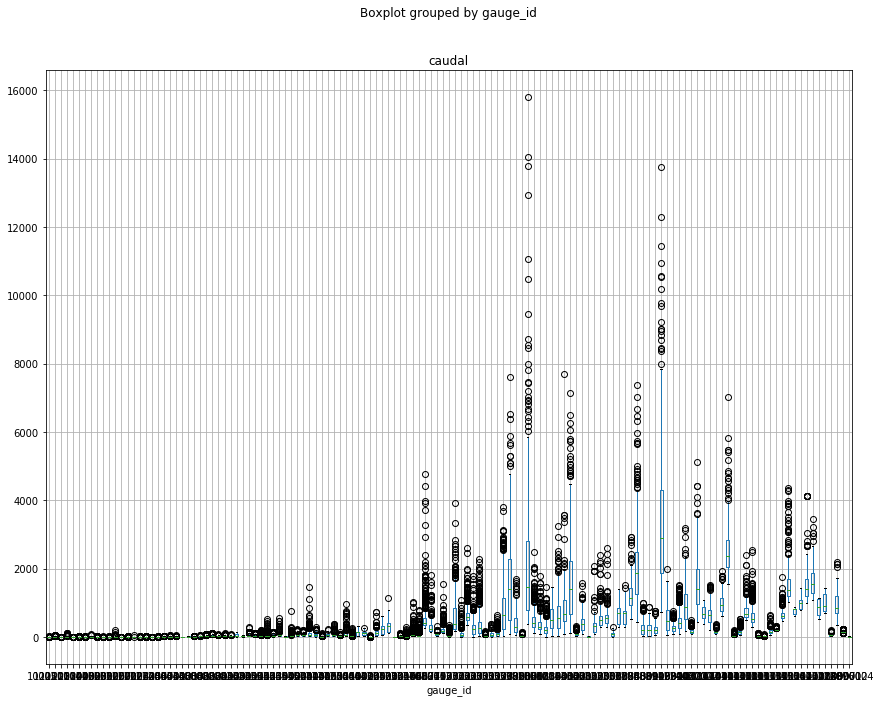

In [64]:
df[df['caudal_extremo'] == 1].boxplot(column='caudal', by='gauge_id', figsize=(14,11))

### Podemos ver que en magnitud algunos caudales considerados extremos podrían no ser apropiados, ya que son extremos en comparación a niveles muy bajos.